In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Entrées

In [2]:
file = "/home/fpichenot/data/statdb_stat_entrees_202210080917.csv.zip"

In [3]:
entrees = pd.read_csv(file)

In [4]:
entrees.columns

Index(['datetime', 'entrees'], dtype='object')

In [5]:
entrees['datetime'] = pd.to_datetime(entrees['datetime'])

In [6]:
entrees = entrees[~entrees['datetime'].isna()]

In [7]:
entrees['annee'] = entrees['datetime'].dt.year

In [8]:
entrees['semaine'] = entrees['datetime'].dt.week

/tmp/ipykernel_30950/3719917228.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  entrees['semaine'] = entrees['datetime'].dt.week


In [9]:
entrees = entrees[entrees['annee'] >= (2022-4)]

In [10]:
data = pd.pivot_table(entrees, values='entrees', index=['semaine'],
                        columns=['annee'], aggfunc=np.sum)

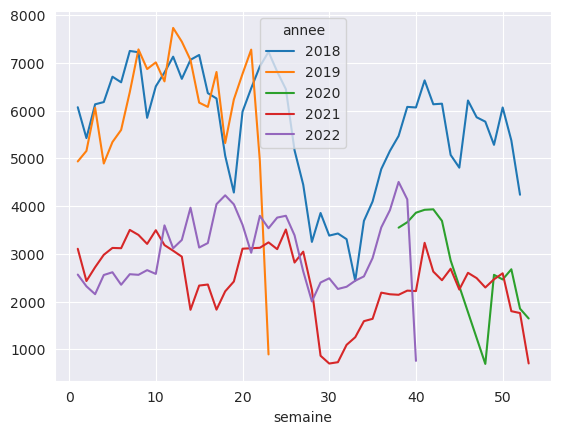

In [11]:
with sns.axes_style('darkgrid'):
    plt.figure()
    sns.lineplot(data=data, markers=None, dashes=False)

# Prêts

In [12]:
file = "/home/fpichenot/data/statdb_stat_issues_202210080915.csv.zip"

In [13]:
prets = pd.read_csv(file)

/tmp/ipykernel_30950/3311023485.py:1: DtypeWarning: Columns (12,20,23) have mixed types. Specify dtype option on import or set low_memory=False.
  prets = pd.read_csv(file)


In [14]:
prets.columns

Index(['issuedate', 'date_due', 'returndate', 'renewals', 'branch',
       'arret_bus', 'borrowernumber', 'cardnumber', 'age', 'sexe', 'ville',
       'id_ic2n', 'iris', 'branchcode', 'categorycode', 'fidelite',
       'itemnumber', 'homebranch', 'location', 'ccode', 'ccode_old',
       'itemcallnumber', 'itemtype', 'publicationyear', 'biblionumber',
       'dateaccessioned', 'cle', 'timestamp', 'issue_id', 'returnbranch'],
      dtype='object')

In [15]:
prets = prets[~prets['issuedate'].isna()]

In [16]:
len(prets)

1266806

In [17]:
prets['issuedate'] = pd.to_datetime(prets['issuedate'])
prets['annee'] = prets['issuedate'].dt.year
prets['semaine'] = prets['issuedate'].dt.week

/tmp/ipykernel_30950/3909729204.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  prets['semaine'] = prets['issuedate'].dt.week


In [18]:
prets = prets[prets['annee'] >= 2019]
prets = prets[prets['location'] != 'MED0A']

In [19]:
len(prets)

1115292

In [20]:
data = pd.pivot_table(prets, values='itemnumber', index=['semaine'],
                        columns=['annee'], aggfunc='count')

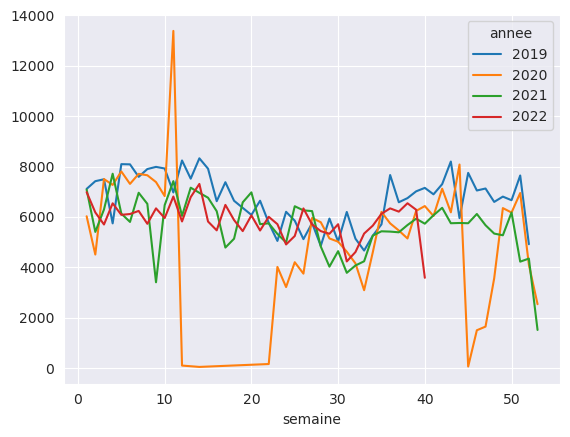

In [21]:
with sns.axes_style('darkgrid'):
    plt.figure()
    sns.lineplot(data=data, markers=None, dashes=False)

# Connexions postes

In [22]:
file = "/home/fpichenot/data/statdb_stat_webkiosk_202210080918.csv.zip"

In [23]:
wk = pd.read_csv(file)

/tmp/ipykernel_30950/4093625853.py:1: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  wk = pd.read_csv(file)


In [24]:
wk.columns

Index(['heure_deb', 'heure_fin', 'espace', 'poste', 'id', 'borrowernumber',
       'age', 'sexe', 'ville', 'iris', 'branchcode', 'categorycode',
       'fidelite'],
      dtype='object')

In [25]:
wk = wk[~wk['heure_deb'].isna()]
wk['heure_deb'] = pd.to_datetime(wk['heure_deb'])
wk['annee'] = wk['heure_deb'].dt.year
wk['semaine'] = wk['heure_deb'].dt.week

/tmp/ipykernel_30950/1843330985.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  wk['semaine'] = wk['heure_deb'].dt.week


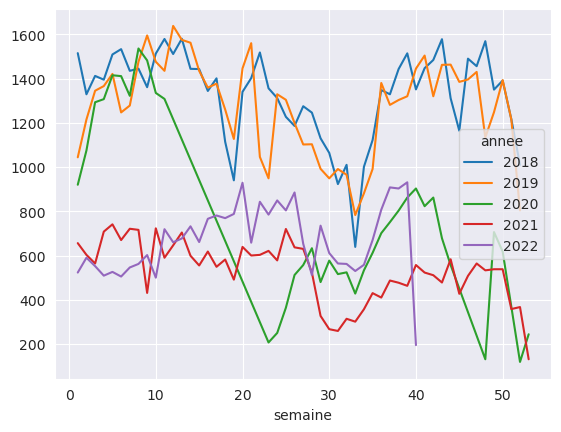

In [26]:
wk = wk[wk['annee'] >= 2018]

data = pd.pivot_table(wk, values='heure_deb', index=['semaine'],
                        columns=['annee'], aggfunc='count')
with sns.axes_style('darkgrid'):
    plt.figure()
    sns.lineplot(data=data, markers=None, dashes=False)

# Réservations

In [27]:
file = "/home/fpichenot/data/statdb_stat_reserves_202210081027.csv.zip"
resas = pd.read_csv(file)
resas.columns

/tmp/ipykernel_30950/1607005448.py:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  resas = pd.read_csv(file)


Index(['reserve_id', 'borrowernumber', 'reservedate', 'biblionumber',
       'branchcode', 'notificationdate', 'cancellationdate', 'priority',
       'found', 'timestamp', 'itemnumber', 'waitingdate', 'expirationdate',
       'etat', 'espace', 'age', 'sexe', 'ville', 'iris', 'branchcode_borrower',
       'categorycode', 'fidelite', 'motif_annulation', 'courriel', 'mobile',
       'annulation', 'document_mis_cote', 'ccode', 'issuedate',
       'waiting_duration'],
      dtype='object')

In [28]:
resas = resas[~resas['reservedate'].isna()]
resas['reservedate'] = pd.to_datetime(resas['reservedate'])
resas['annee'] = resas['reservedate'].dt.year
resas['semaine'] = resas['reservedate'].dt.week

/tmp/ipykernel_30950/624271924.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  resas['semaine'] = resas['reservedate'].dt.week


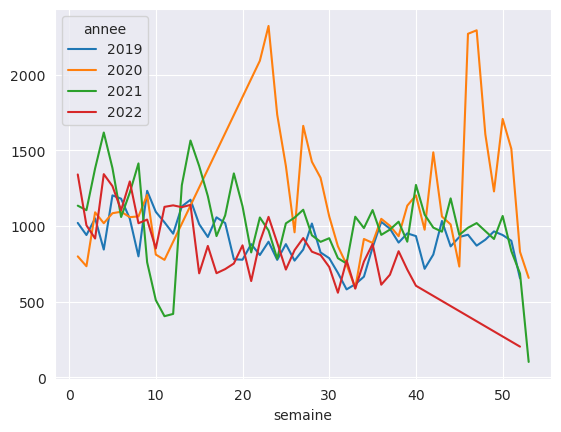

In [29]:
resas = resas[resas['annee'] >= 2018]

data = pd.pivot_table(resas, values='reservedate', index=['semaine'],
                        columns=['annee'], aggfunc='count')
with sns.axes_style('darkgrid'):
    plt.figure()
    sns.lineplot(data=data, markers=None, dashes=False)

In [30]:
data

annee,2019,2020,2021,2022
semaine,,,,
1,1020.0,799.0,1134.0,1340.0
2,940.0,734.0,1104.0,1004.0
3,1050.0,1090.0,1380.0,917.0
4,844.0,1018.0,1617.0,1342.0
5,1202.0,1084.0,1382.0,1263.0
6,1180.0,1094.0,1059.0,1104.0
7,1048.0,1058.0,1220.0,1294.0
8,799.0,1063.0,1413.0,1018.0
9,1232.0,1205.0,760.0,1042.0
